# Data Visualization - InfoVis

## t-SNE



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.patches import Patch
import matplotlib.image as mpimg
from matplotlib import rcParams

import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import sigProfilerPlotting as sigPlt
import umap.umap_ as umap
import os
os.chdir("C:/Users/sande/PycharmProjects/MEP_data")

%matplotlib inline

sns.set(rc={'figure.figsize':(10.0,8.27)})

In [2]:
def EDA_UMAP(zou, n_comp, title, metric='euclidean', n_neighbors= 15):
    '''
    UMAP for VOLKOVA data.
    
    UMAP settings:
    n_neighbors : 15 (default)
        local (low value) vs global (high value) structure
    min_dist : 0.1 (default)
        minimum distance between points in low dim
    n_components : 2
        number of dimensions
    metric : 'cosine'
    '''

    x = zou.loc[:, temp.columns[0:119]].values # Separating out the target
    x = StandardScaler().fit_transform(x)

    reducer = umap.UMAP(random_state=42, n_components=n_comp, metric=metric, n_neighbors = n_neighbors)
    embedding = reducer.fit_transform(x)

    final_df = pd.DataFrame(data=embedding, columns=np.arange(n_comp) + 1)
    final_df = pd.concat([final_df, zou[['Pathway','Mutagen','Genotype','Count']].reset_index(drop=True)], axis =1)
    
    plt.figure(figsize=(12,8))
    
    num_labels = len(set(zou.loc[:, ['Pathway']].values.flatten()))
    
    sns.scatterplot(
        x= 1 , y= 2,
        hue="Pathway",
        size = "Count",
        sizes=(50,500),
        palette=sns.color_palette("bright", num_labels),
        data=final_df,
        alpha=0.9,
        legend ='auto'
    )
    
#     plt.title('UMAP - {0} - {1} - {2} - {3}'.format(*title))
    plt.title('UMAP')
    plt.xlabel('axis 1')
    plt.ylabel('axis 2')
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
#     plt.savefig('figures/EDA_zou/UMAP_{0}_{1}_{2}_{3}_3n_cosine.svg'.format(*title),bbox_inches='tight')

    plt.show()
    
    num_labels = len(set(zou.loc[:, ['Mutagen']].values.flatten()))

    sns.scatterplot(
        x= 1 , y= 2,
        hue="Mutagen",
        size = "Count",
        sizes=(50,500),
        palette=sns.color_palette("bright", num_labels),
        data=final_df,
        alpha=0.9,
        legend ='auto'
    )
#     plt.title('UMAP - {0} - {1} - {2} - {3}'.format(*title))
    plt.title('UMAP')
    plt.xlabel('axis 1')
    plt.ylabel('axis 2')
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
#     plt.savefig('figures/EDA_zou/UMAP_{0}_{1}_{2}_{3}_3n_cosine.svg'.format(*title),bbox_inches='tight')

    plt.show()
    
    
    print(final_df)
    final_df = pd.concat([final_df, zou.loc[:, temp.columns[0:119]].reset_index(drop=True)], axis =1)
    print(final_df)
    
    return final_df

In [21]:
# import Volkova
volkova_df1 = pd.read_pickle('volkova.pkl')
# print(volkova_df1)
volkova_df2 = pd.read_pickle('volkova2.pkl')
df = pd.merge(volkova_df1, volkova_df2, on="Sample")
df['Mutagen'] = df['Mutagen'].fillna(0)

df.shape

(2717, 135)

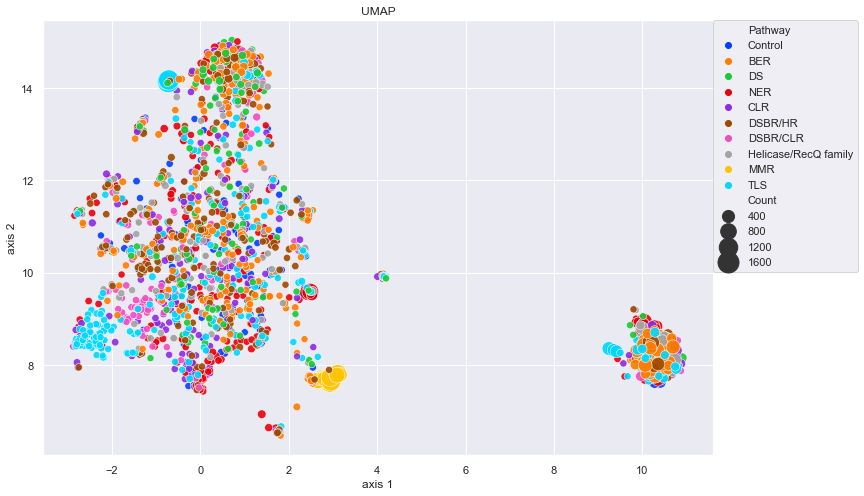

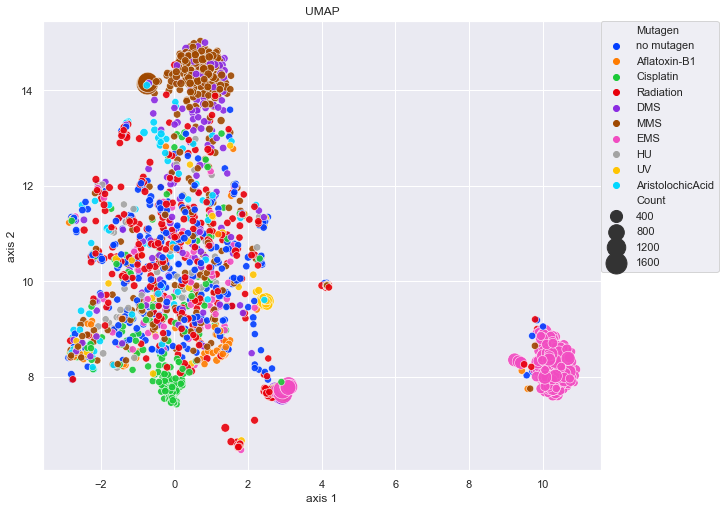

             1          2  Pathway       Mutagen Genotype  Count
0    -0.685371   9.458860  Control    no mutagen       N2      6
1     1.574754   9.944848  Control    no mutagen       N2     10
2     2.363623  10.507925  Control    no mutagen       N2      9
3     1.128934   9.097819  Control  Aflatoxin-B1       N2      6
4     1.371465   8.457346  Control  Aflatoxin-B1       N2     15
...        ...        ...      ...           ...      ...    ...
1947  2.177991  11.563664  DSBR/HR     Radiation   rad-51     22
1948  1.741410   6.532427  DSBR/HR     Radiation   rad-51     38
1949  0.261518  11.303793  DSBR/HR     Radiation   rad-51     36
1950 -1.324467  10.084566  DSBR/HR     Radiation   rad-51     29
1951  1.111899  13.882980  DSBR/HR     Radiation   rad-51     25

[1952 rows x 6 columns]
             1          2  Pathway       Mutagen Genotype  Count  A[C>A]A  \
0    -0.685371   9.458860  Control    no mutagen       N2      6     0.00   
1     1.574754   9.944848  Control    no 

In [19]:

# import Volkova
volkova_df1 = pd.read_pickle('volkova.pkl')
# print(volkova_df1)
volkova_df2 = pd.read_pickle('volkova2.pkl')
df = pd.merge(volkova_df1, volkova_df2, on="Sample")
df['Mutagen'] = df['Mutagen'].fillna(0)

features = list(df.columns)
df['Count'] = df.loc[:,features[1:120]].sum(axis=1)

y = df.loc[:, ['Mutagen','Genotype','Generation','Count']]

# # print(df['Count'].groupby(0).count())
# counts = df.groupby(by='Count').agg('count')
# print(counts)


# Filter Generation
# generation = set(df.loc[:, ['Generation']].values.flatten())
# generation.difference_update([0])


# mutagen = set(df.loc[:, ['Mutagen']].values.flatten())
# # mutagen.remove(0)

temp = df.loc[:, features[1:120]].div(df.loc[:,features[1:120]].sum(axis=1), axis=0)
# temp = df.loc[:, features[1:97]].div(df.loc[:,features[1:97]].sum(axis=1), axis=0)
temp = pd.concat([temp, y],axis=1)
temp.dropna(subset=features[1:120], inplace=True)
# temp = temp[~temp['Mutagen'].isin(mutagen)]

temp = temp[~temp['Generation'].isin([0])]


# PATHWAY
xls = pd.ExcelFile('data/volkova2021/KO_pathway.xlsx')
pathways = pd.read_excel(xls, 'Blad1', header=0)
temp = pd.merge(temp, pathways, on='Genotype')
pathway = set(temp.loc[:, ['Pathway']].values.flatten())
pathway.difference_update(['Control','MMR'])
# temp = temp[~temp['Pathway'].isin(pathway)]


temp = temp[temp['Count'] > 5] 

temp['Mutagen'] = temp['Mutagen'].replace(0, 'no mutagen')
temp['Pathway'] = temp['Pathway'].replace('-', 'no pathway')

muts = ['Mechlorethamine','Xray','MMS/EMS/DMS','Mitomycin']
paths = ['no pathway','SAC','DSBR','Helicase','TR','Replicative polymerase','DR','DSBR/NHEJ']
temp = temp[~temp['Mutagen'].isin(muts)]
temp = temp[~temp['Pathway'].isin(paths)]



# # EDA_UMAP(temp, 2, [0], metric='cosine', n_neighbors = 4)
# EDA_UMAP(temp, 2, [0], metric='cosine', n_neighbors = 7)
# EDA_UMAP(temp, 2, [0], metric='cosine', n_neighbors = 15)
# EDA_UMAP(temp, 2, [0], n_neighbors = 25)

UMAP_coord = EDA_UMAP(temp, 2, [0], metric='cosine', n_neighbors = 25)

UMAP_coord = UMAP_coord.rename(columns={'1': 'UMAP_x'})
UMAP_coord = UMAP_coord.rename(columns={'2': 'UMAP_y'})

UMAP_coord



UMAP_coord.to_csv("data/DV_infovis/volkova_final_2.csv")

# EDA_UMAP(temp, 2, [0], metric='euclidean', n_neighbors = 25)




# Filter + Merge data frames


# normalize


# tSNE

In [91]:
data = pd.read_csv("data/DV_infovis/volkova_final_2.csv")
data

print(data['Mutagen'].unique())
print(data['Pathway'].unique())




['no mutagen' 'Aflatoxin-B1' 'Mechlorethamine' 'Cisplatin' 'Radiation'
 'Xray' 'DMS' 'MMS' 'EMS' 'HU' 'MMS/EMS/DMS' 'UV' 'AristolochicAcid'
 'Mitomycin']
['Control' 'BER' 'DS' 'NER' 'CLR' 'DSBR/NHEJ' 'TR' 'DSBR/HR' 'DSBR/CLR'
 'Helicase/RecQ family' 'MMR' 'Replicative polymerase' 'TLS' 'DR' 'DSBR'
 'Helicase' 'SAC' 'no pathway']


In [20]:
data = pd.read_csv("data/DV_infovis/volkova_final_2.csv")

print(data['1'].min())
print(data['1'].max())
print(data['2'].min())
print(data['2'].max())
print(data['Count'].min())
print(data['Count'].max())

-2.8732414
10.901633
6.4725122
15.029383
6
1846


In [103]:
data = pd.read_csv("data/DV_infovis/volkova_final.csv")

data = data.rename(columns={'1': 'UMAP_x'})
data = data.rename(columns={'2': 'UMAP_y'})

data = data.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'])

print(data)


# data.to_csv("data/DV_infovis/volkova_final.csv")

                 

        UMAP_x     UMAP_y     Pathway       Mutagen Genotype  Count  A[C>A]A  \
0     2.730459   7.429017     Control    no mutagen       N2      6      0.0   
1     4.528431   8.980611     Control    no mutagen       N2     10      0.0   
2     5.040901   8.500568     Control    no mutagen       N2      9      0.0   
3     3.902378   7.591788     Control  Aflatoxin-B1       N2      6      0.0   
4     3.935033   6.967735     Control  Aflatoxin-B1       N2     15      0.0   
...        ...        ...         ...           ...      ...    ...      ...   
2268  2.276632  10.702613  no pathway    no mutagen    rif-1     14      0.0   
2269  2.767657   9.399398  no pathway    no mutagen    rif-1      6      0.0   
2270  2.556808   9.200618  no pathway    no mutagen    rif-1     11      0.0   
2271  4.433450   8.402239  no pathway    no mutagen    rif-1     12      0.0   
2272  4.583209   8.385367  no pathway    no mutagen    rif-1     19      0.0   

       A[C>A]C   A[C>A]G  A[C>A]T  ... 

In [105]:
# HEATMAP pathway x mutagen mean

data = pd.read_csv("data/DV_infovis/volkova_final.csv")

mutagen = data['Mutagen'].unique().tolist()
pathways = data['Pathway'].unique().tolist()

print(mutagen.index('MMS'))

total = np.zeros((len(mutagen),len(pathways)))
n_samples = np.zeros((len(mutagen),len(pathways)))

for index, row in data.iterrows():
    m = mutagen.index(row['Mutagen'])
    p = pathways.index(row['Pathway'])
    heatmap[m,p] += row['Count']
    n_samples[m,p] += 1


    





7


In [ ]:
data = pd.read_csv("data/DV_infovis/volkova_final.csv")

muts = ['Mechlorethamine','Xray','MMS/EMS/DMS','Mitomycin']
paths = ['no pathway','SAC','DSBR','Helicase']

data = data[data['Mutagen'] not in muts]
data = data[data['Pathways'] not in paths]